## Here's what you need to know to get started: 
### Short Version: 
> There is KMeans and KMeans Minibatch. KMeans Minibatch is faster, use that. KMeans++ is a default input parameter for both and is optimal for good clustering.

### Long Version: 
>We use KMeans as opposed to Mean Shift cause it runs faster. KMeans in Big O is O(kN) while Meanshift is is O(kN^2). There is a good picture on Wiki that shows how Kmeans works. It uses Voronoi tesselations and is an iterative process. KMeans++ ensures that the initial points chosen for Kmeans(Minibatch or not) are far apart which is good cause randomly chosen points can be close together (bad for clustering purposes).


### Runtime Table:

>| Sample size | Dimensions (x, y, z, vx, vy, vz) | # of Clusters | Runtime |
 | ----------- | ---------------------------------| ------------- | ------- |
 | 100     | right-aligned | $1600 |
 | col 2 is      | centered      |   $12 |
 | zebra stripes | are neat      |    $1 |



---

In [1]:
import sys
sys.path.append("..") # lets you import from outer folder
from search import search_local # imports module within search folder
samples = search_local.search_phase_space(0, 0, 0, 0, 0, 0, epsilon = 0.3, v_scale = 0.1)
len(samples)

ModuleNotFoundError: No module named 'search'

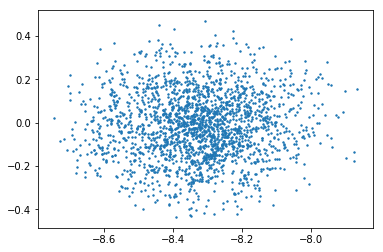

In [128]:
import matplotlib.pyplot as plt
plt.scatter(samples[:,0], samples[:,1], s = 2)
plt.show()

In [129]:
#lets try minibatchkmeans woohoo!
from sklearn.cluster import MiniBatchKMeans

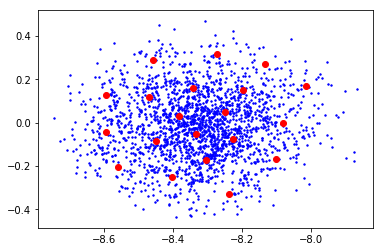

In [163]:
# %%timeit -n1 -r1, uncomment if you want to check runtime for 1 instance (by default it runs this many time and finds avg)
my_kmeans = MiniBatchKMeans(n_clusters = 20)
my_kmeans.fit(samples[:, :2])

plt.scatter(samples[:,0], samples[:,1], s = 2, c = 'blue')
plt.scatter(my_kmeans.cluster_centers_[:, 0],
            my_kmeans.cluster_centers_[:, 1], c = 'red')
plt.show()

In [164]:
my_kmeans

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=20,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

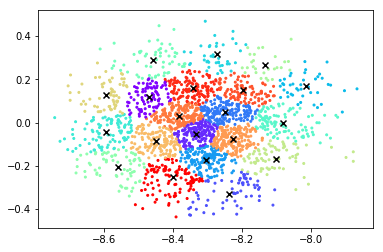

In [167]:
import numpy as np

cmap = plt.get_cmap("rainbow")
colours = cmap(np.linspace(1, 0, 20))

plt.scatter(samples[:,0], samples[:,1], s = 4, c = colours[my_kmeans.labels_])
plt.scatter(my_kmeans.cluster_centers_[:, 0],
            my_kmeans.cluster_centers_[:, 1], marker='x', c = 'black')
plt.show()

In [170]:
# lets try in 3D!

array([[ -8.40116097e+00,  -2.52822359e-01],
       [ -8.34314223e+00,   1.59187644e-01],
       [ -8.19734506e+00,   1.52137736e-01],
       [ -8.38223325e+00,   2.94665752e-02],
       [ -8.22654090e+00,  -7.79559536e-02],
       [ -8.44885481e+00,  -8.53863989e-02],
       [ -8.59299497e+00,   1.26582747e-01],
       [ -8.10149050e+00,  -1.66335273e-01],
       [ -8.13301497e+00,   2.68189309e-01],
       [ -8.56004087e+00,  -2.06308984e-01],
       [ -8.45672368e+00,   2.87694348e-01],
       [ -8.08177425e+00,  -3.78345424e-04],
       [ -8.59274426e+00,  -4.45797699e-02],
       [ -8.27207809e+00,   3.17774334e-01],
       [ -8.01458770e+00,   1.66895654e-01],
       [ -8.30559662e+00,  -1.73997426e-01],
       [ -8.24930195e+00,   4.96965953e-02],
       [ -8.23634763e+00,  -3.28897441e-01],
       [ -8.33402334e+00,  -5.09207199e-02],
       [ -8.46927552e+00,   1.17095337e-01]])